# Assignment

The goal of this assignment is to understand and implement different types of regression and classification algorithms using Python. The specific algorithms to be used are:

### Algorithms: 
* Logistic Regression 
* Naive Bayes

### Tasks: 
1. Perform EDA on the dataset and pre-processing if necessary.
2. Train a logistic regression and naive bayes model using the dataset.
3. Evaluate the model's performance using appropriate metrics (e.g. accuracy, precision, recall, etc.).
4. Use the trained model to make predictions on unseen data.
5. Compare the perfomance of Logistic Regression and Naive Bayes.
6. Analyze the results and draw conclusions.

### DATASET - *AI4I 2020 Predictive Maintenance*

#### Description

The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry. Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

#### Attribute Information:

The dataset consists of 10000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- Product ID: unique identifier starting with the Type and then followed with a number
- Type: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with a f = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
- 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes :

- tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200-240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
- heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
- power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
- overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
- random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

# Inputs 
- Type
- Air temperature [K]
- Process temperature [K]
- Rotational speed [rpm]
- Torque [Nm]
- Tool wear [min]

# Output
- Machine failure (1 = failed, 0 = not failed)

Dataset Link: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

### Submission

Assignment is submitted as a Jupyter notebook on a GitHub repository. The notebook contains all code and outputs. A PDF version of the notebook is also available. 

 





In [2]:
# all full library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# all sklearn specific imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [24]:
# load the data
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [25]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## Data Pre-Processing

- The dataset has 10000 rows and 14 columns and we perform EDA on the dataset to understand the data better by checking for missing values, outliers, and other anomalies in the data.There is no missing value or duplicate value in the dataset.

- Convert all data types to float, as to provide numerical consistency between all entries and their attributes for the model

- Remove the first character off of the "Product ID" for conversion to a number

- Convert the categorical columns to numerical columns using label encoding for the "Type" attribute.

In [4]:
# Check for duplicate values and drop them
print("Checking for duplicate values: ", df.duplicated().sum() != 0)

Checking for duplicate values:  False


In [5]:
# set the numeric columns data type to float
df['Process temperature [K]'] = df['Process temperature [K]'].astype(float)
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype(float)
df['Torque [Nm]'] = df['Torque [Nm]'].astype(float)
df['Tool wear [min]'] = df['Tool wear [min]'].astype(float)
df['Machine failure'] = df['Machine failure'].astype(float)

In [6]:
# Remove first character and set to numeric dtype
df['Product ID'] = df['Product ID'].apply(lambda x: x[1:])
df['Product ID'] = pd.to_numeric(df['Product ID'])

In [27]:
# Convert the Type column M,L,H to 0,1,2
ds = df["Type"].value_counts().reset_index()[:28]
df['Type'] = df['Type'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Exploratory Data Analysis

- When performing EDA on the dataset, the Product ID distribution can be visually confirmed with representation as a Pie Chart and Histogram.

- The EDA confirms that the Type is indeed distributed as anticipated by the aforementioned attribute information.

- By plotting a heatmap of the correlations by attribute, EDA also relevals positive and negative correlations. 

- It is shown that Air Temperature and Process Temperature positively correlate with each other: as one increases, so does the other. In contrast, Torque and Rotational Speed have a negative correlation: as one increases, the other decreases. 

- These phenomena are to be expected, as temperature is a physical phenomena with diffusive properties: it speads from high potential to low potential, and an increase in temperature in one area would eventually spread to other areas. Likewise, the inverse relationship between torque and rotational speed are mechanical properties of gearing ratios. Given the same amount of power, an increase in gearing ratio (going from a small gear to a larger gear) produces higher torque at a lower speed. A decrease in gearing ratio produces a higher speed at a lower torque.

In [30]:
ds

,index,Type
0,L,6000
1,M,2997
2,H,1003


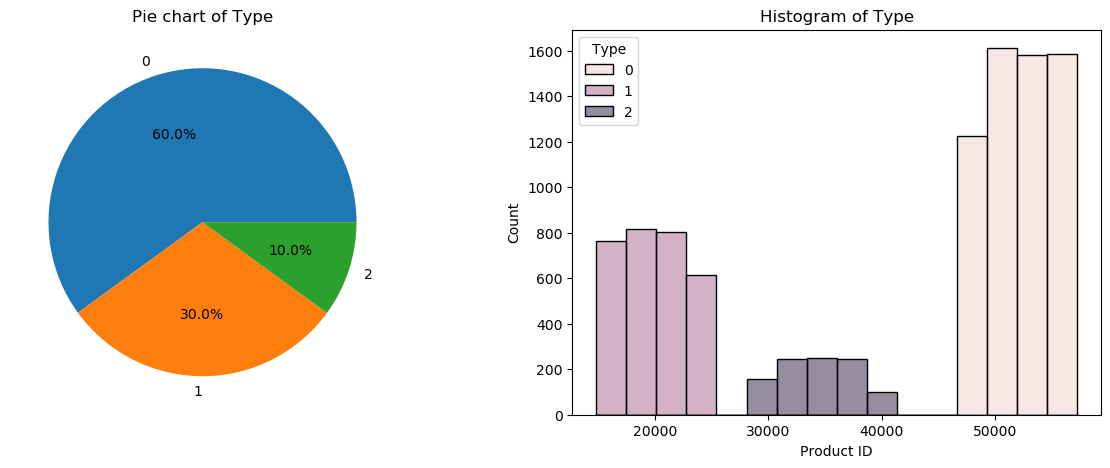

In [8]:
# Show both plots in the same figure using subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Pie chart of Type')
sns.histplot(data=df, x='Product ID', hue='Type', ax=ax[1])
ax[1].set_title('Histogram of Type')
plt.show()

In [9]:
# Drop the UDI and Product ID column as it is not needed for the model training
df_ = df.copy()
df = df_.drop(['UDI', 'Product ID'], axis=1)

# Check for missing values
df.isnull().sum()

# Print count of Unique values of each column
for col in df.columns:
    print(col, df[col].nunique())

Type 3
Air temperature [K] 93
Process temperature [K] 82
Rotational speed [rpm] 941
Torque [Nm] 577
Tool wear [min] 246
Machine failure 2
TWF 2
HDF 2
PWF 2
OSF 2
RNF 2


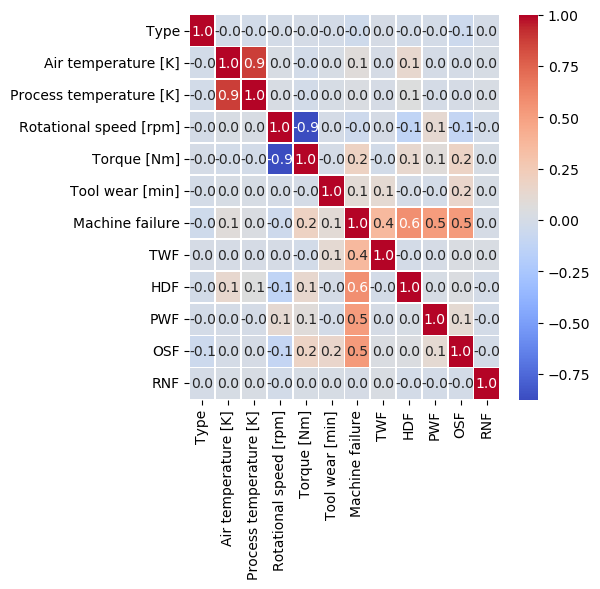

In [10]:
# Plot the correlation matrix 
corr = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.1f')
plt.show()

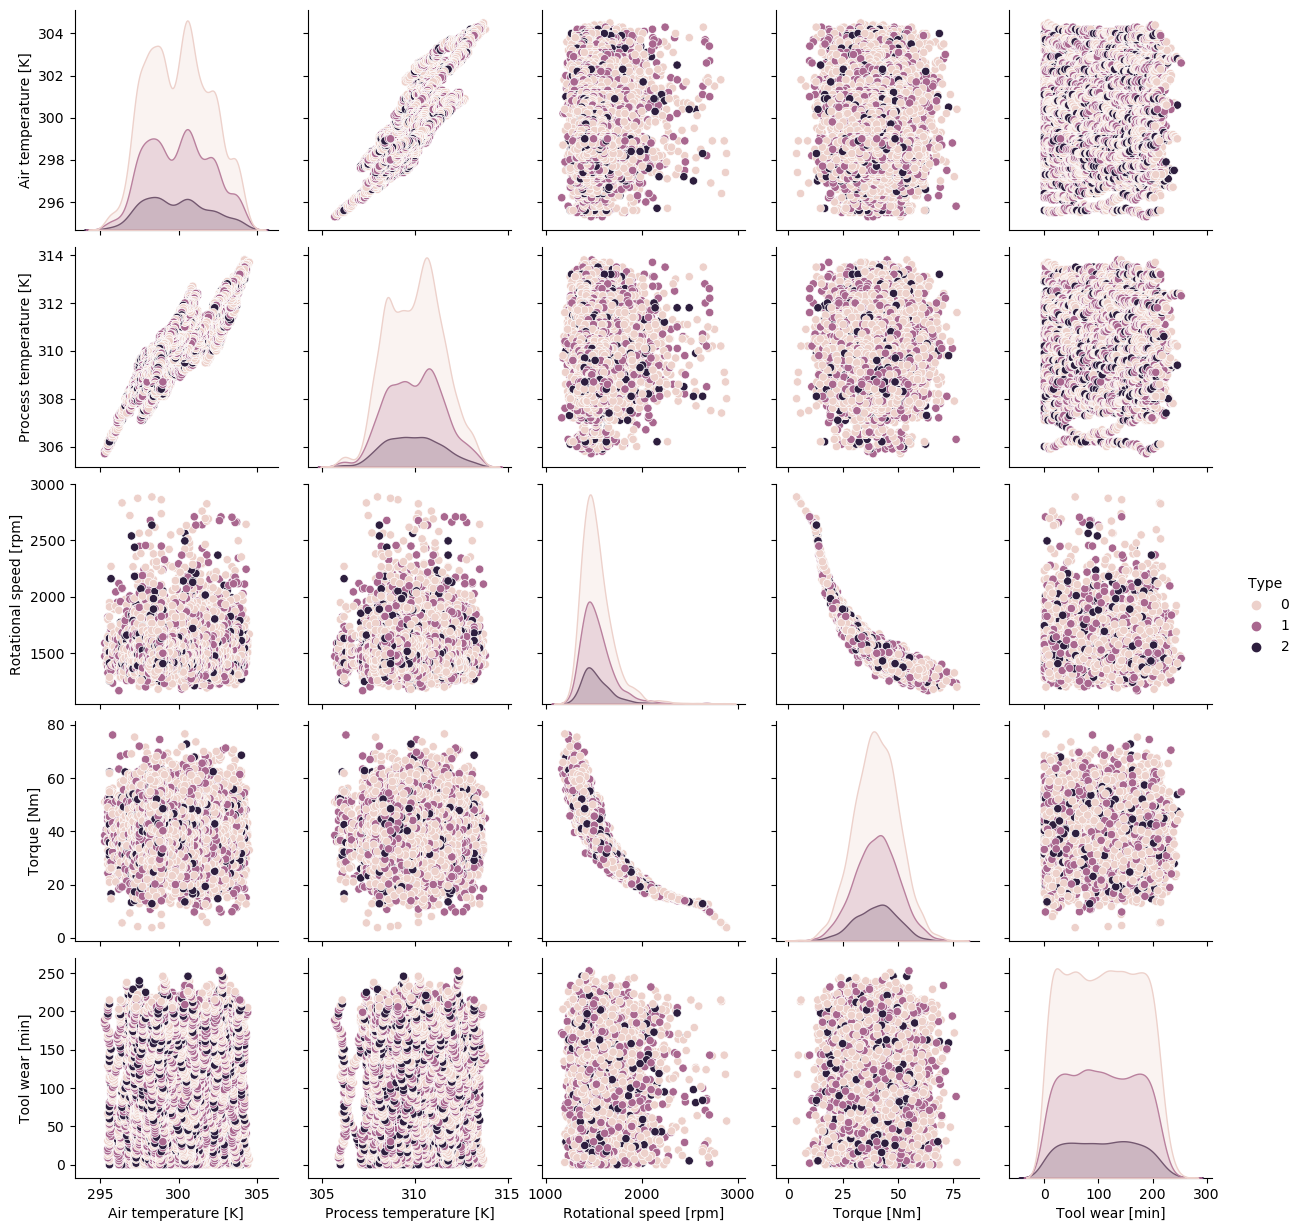

In [11]:
# Plot visualizations of the data and their correlations with the target variable
numeric_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Type']
sns.pairplot(df.loc[:,numeric_cols],hue="Type",diag_kind='kde',kind='scatter')
plt.show()

# Feature Engineering

- We now analyse the correlation between the features and the target variable 'Machine failure'. We find that the 'Tool wear [min]' column has the highest correlation with the target variable. We also find that the 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]' columns have a high correlation with the target variable.

- In order to prepare the test and training data to predict the target variable, we drop the target variable from the data and store that into array X. We then isolate the target variable "Machine Failure" and put that into vector Y. 

- Note: We also drop the Machine Failure categories when creating arary X, as those attributes do not contribute to the determination of the target variable, they are simply a category the target variable can fall into. We must remove these, otherwise our model will only look a positive category of failure, rather than actually predict whether or not there is failure from any of the driving correlative attributes. (i.e. a model that determines if the machine has FAILED based on the fact that a TYPE OF FAILURE is true is actually predicting and revealing nothing of value, as this is always the case, and is thus a useless model)

In [12]:
# Standardize the data 
X = df.drop(['Machine failure','TWF','HDF','PWF','OSF','RNF'], axis=1)
y = df['Machine failure']

print(X.shape, y.shape)

(10000, 6) (10000,)


In [28]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551.0,42.8,0.0
1,0,298.2,308.7,1408.0,46.3,3.0
2,0,298.1,308.5,1498.0,49.4,5.0
3,0,298.2,308.6,1433.0,39.5,7.0
4,0,298.2,308.7,1408.0,40.0,9.0
...,...,...,...,...,...,...
9995,1,298.8,308.4,1604.0,29.5,14.0
9996,2,298.9,308.4,1632.0,31.8,17.0
9997,1,299.0,308.6,1645.0,33.4,22.0
9998,2,299.0,308.7,1408.0,48.5,25.0


In [29]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Machine failure, Length: 10000, dtype: float64

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
 # Print the shapes of the training and testing sets and top 5 rows of the training set , X_train, y_train and X_test, y_test
print("----Training Data ----")
print(X_train.shape, y_train.shape)
print("----Test Data ----")
print(X_test.shape, y_test.shape)

for i in range(5):
    print("Training Set:", X_train[i], y_train.iloc[i])
    print("Testing Set:", X_test[i], y_test.iloc[i])

----Training Data ----
(7000, 6) (7000,)
----Test Data ----
(3000, 6) (3000,)
Training Set: [-0.75313596 -1.04701961 -0.60267611 -0.54145587  1.03051997 -1.30583543] 0.0
Testing Set: [-0.75313596  1.1074301   1.0105289   0.04873445 -0.75987461 -0.41449086] 0.0
Training Set: [ 0.73108469  0.40598135  0.94331203  1.74135573 -1.78009946 -0.85234433] 0.0
Testing Set: [-0.75313596 -1.09712309 -1.87979674 -1.04812869  1.63065223  1.03980817] 0.0
Training Set: [-0.75313596  0.85691269  0.40557702  0.03203095  0.21033921 -0.61777997] 0.0
Testing Set: [ 0.73108469  0.65649876  0.27114327 -0.21295371 -0.01971149  1.24309728] 0.0
Training Set: [-0.75313596 -0.44577783  0.27114327  0.05987011  0.39037889 -0.44576611] 0.0
Testing Set: [ 2.21530533 -1.14722658 -0.80432673 -0.39112437  0.37037448 -0.1799265 ] 0.0
Training Set: [ 2.21530533  0.80680921 -0.0649411  -0.6472447   1.36059272 -0.19556413] 0.0
Testing Set: [ 0.73108469  0.40598135  0.27114327 -1.39890218  2.40082197 -1.63422554] 0.0


## Model Building

### Logistic Regression 

- Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

- The mathematical equation for logistic regression is:

$$\frac{1}{1+e^{-z}}$$

- The goal of logistic regression is to find the best fit line for the data. The best fit line is the line that has the least error. The error is the difference between the actual value and the predicted value. The error is calculated using the mean squared error function.

- The mean squared error function is:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$


In [15]:
##
## Logistic Regression
##

# lr : Logistic Regression model  , y_pred_lr : Predicted values of y_test 

# Create linear regression object
lr = LogisticRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Evaluation metrics

y_pred_lr = lr.predict(X_test)
log_train = round(lr.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

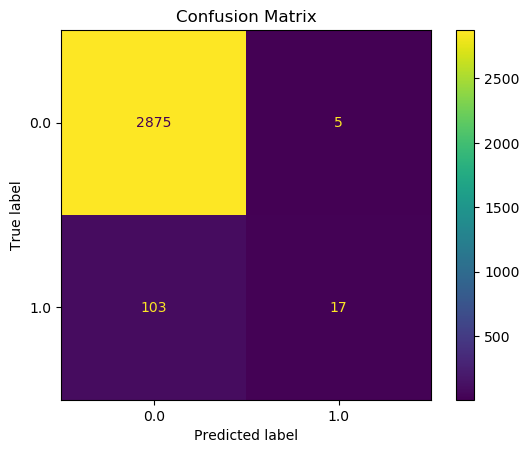

In [17]:
# Show Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes

- Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.


- The mathematical equation for naive bayes is:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

- The goal of naive bayes is to find the best fit line for the data. The best fit line is the line that has the least error. The error is the difference between the actual value and the predicted value. The error is calculated using the mean squared error function.

- The mean squared error function is:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$


In [18]:
##
## Naive Bayes Classifier
##

# gnb : Naive Bayes Model  , y_pred_gnb : Predicted values of y_test

# Create Gaussian Naive Bayes object
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
# Evaluation metrics

y_pred_gnb = gnb.predict(X_test)
gnb_train = round(gnb.score(X_train, y_train) * 100, 2)
gnb_accuracy = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)

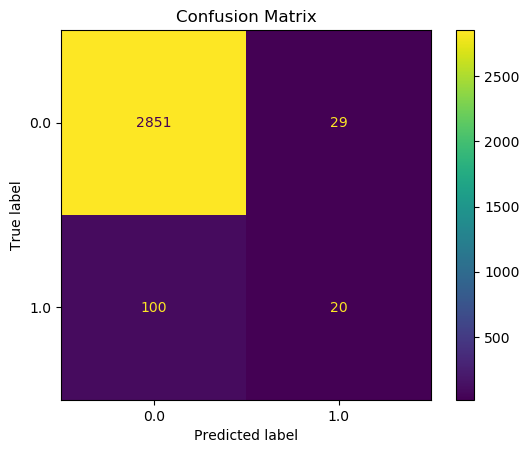

In [20]:
# Show Confustion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb)
plt.title('Confusion Matrix')
plt.show()

## Results

- Logistic Classifier outperformed in Accuracy

- Logistic Classifier outperformed in Precision with a value of 1.0 for "Machine Failure"

- Naive Bayes outperformed in Recall with a value of 1.0 for "Machine Failure"

- F1 Scores are identical

- Based on the results I would consider the Logistic 

In [21]:
# Logistic Classifier Results
print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr,zero_division=0))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 97.29 %
Model Accuracy Score : 96.4 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2880
         1.0       0.77      0.14      0.24       120

    accuracy                           0.96      3000
   macro avg       0.87      0.57      0.61      3000
weighted avg       0.96      0.96      0.95      3000

--------------------------------------------------------


In [22]:
# Naive Bayes Results
print("Training Accuracy    :",gnb_train ,"%")
print("Model Accuracy Score :",gnb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gnb))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 96.31 %
Model Accuracy Score : 95.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2880
         1.0       0.41      0.17      0.24       120

    accuracy                           0.96      3000
   macro avg       0.69      0.58      0.61      3000
weighted avg       0.94      0.96      0.95      3000

--------------------------------------------------------


In [23]:
# Compare the results of the models
results = {'Logistic Regression': [log_accuracy, log_train]}
results['Naive Bayes'] = [gnb_accuracy, gnb_train]
results_df = pd.DataFrame(results, index=['Accuracy', 'Training Accuracy']).T
print(results_df)

                     Accuracy  Training Accuracy
Logistic Regression      96.4              97.29
Naive Bayes              95.7              96.31


## Conclusions

- Based on the results I would consider the Logistic Classifier to be the stronger model. This is because it has a higher accuracy and is more precise. However, the difference is relatively small.

- Precision is a percentage of correct positive predictions relative to total positive predictions. This means that for each single prediction, that prediction is more likely to be correct if the model is precise.

- Recall is the percentage of correct positive predictions relative to total actual positives. This means that for a dataset, more of the correct values are captured by the model if the recall is high.

- The precision of the Logistic Model is 0.77, while the precision of Naive Bayes 0.41 when comparing the positive values for machine failures. 0.77 / 0.41 is about 1.878, so the Logistic Model is almost twice as precise for positive "Machine Failure" values.

- Naive Bayes technically has a higher recall. This means the Naive Bayes is capturing more of the positive "Machine Failures" than the Logistic Bayes model, albeit not by much.

- It should be noted that for negative "Machine Failure" values, the Logistic Classifier didn't miss a single value, as the recall is 1.00.

- All of this being said, the recall of both models is low for positive "Machine Failure". This means that both models are missing most of the positive "Machine Failures" in their predictions.